# Latihan Dikelas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

le = preprocessing.LabelEncoder()


In [2]:
df = pd.read_csv('dataset/exams.csv')

In [3]:
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86


In [4]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [5]:
df = df.drop(['gender', 'race/ethnicity', 'parental level of education', 'lunch'], axis=1)

In [6]:
df

,test preparation course,math score,reading score,writing score
0,completed,59,70,78
1,none,96,93,87
2,none,57,76,77
3,none,70,70,63
4,none,83,85,86
...,...,...,...,...
995,none,77,77,71
996,none,80,66,66
997,completed,67,86,86
998,none,80,72,62


In [7]:
df['test preparation course'] = le.fit_transform(df['test preparation course'])

In [8]:
df

,test preparation course,math score,reading score,writing score
0,0,59,70,78
1,1,96,93,87
2,1,57,76,77
3,1,70,70,63
4,1,83,85,86
...,...,...,...,...
995,1,77,77,71
996,1,80,66,66
997,0,67,86,86
998,1,80,72,62


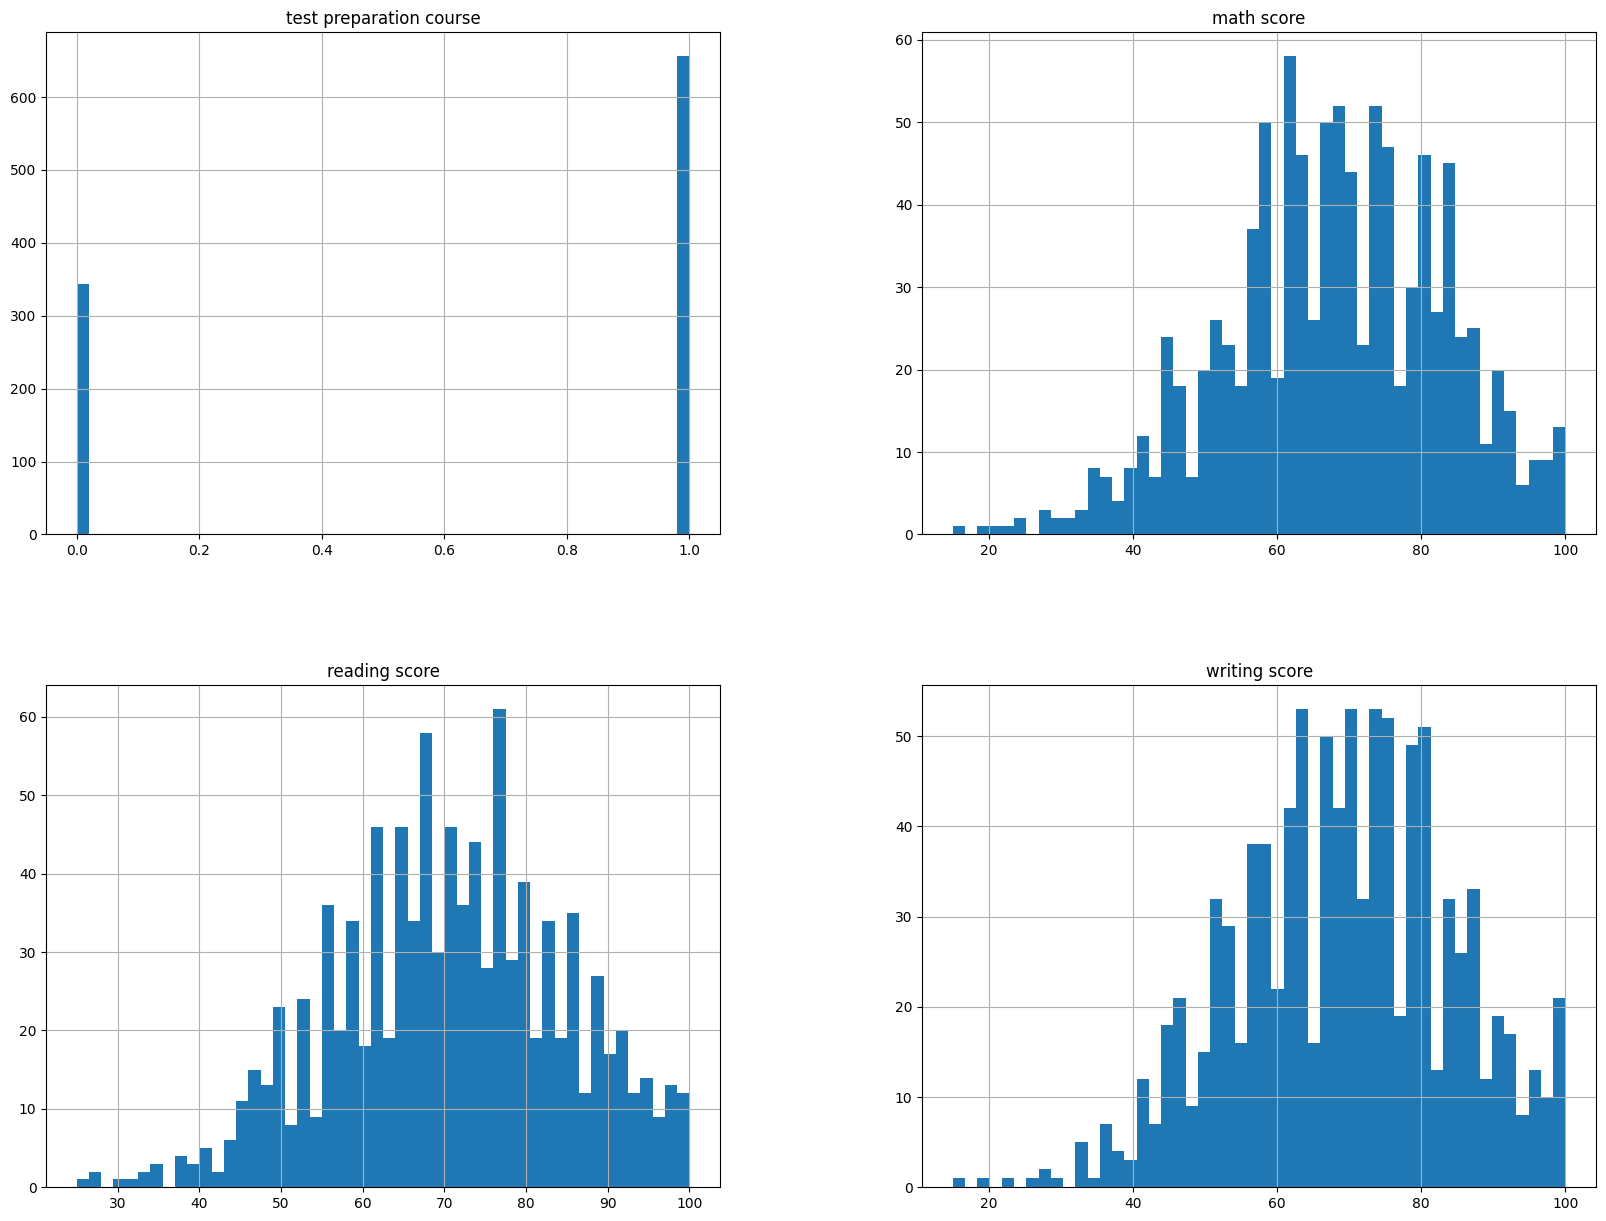

In [9]:
df.hist(bins=50, figsize=(20,15))
plt.show()

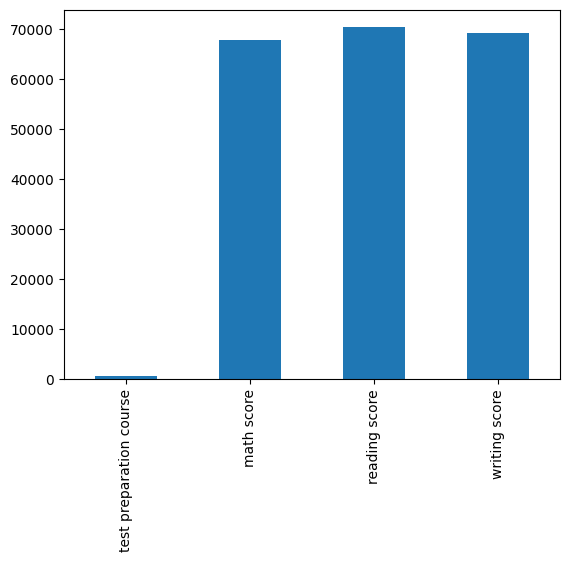

In [10]:
df.sum().plot.bar()
plt.show()

In [11]:

scaler = MinMaxScaler()

df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

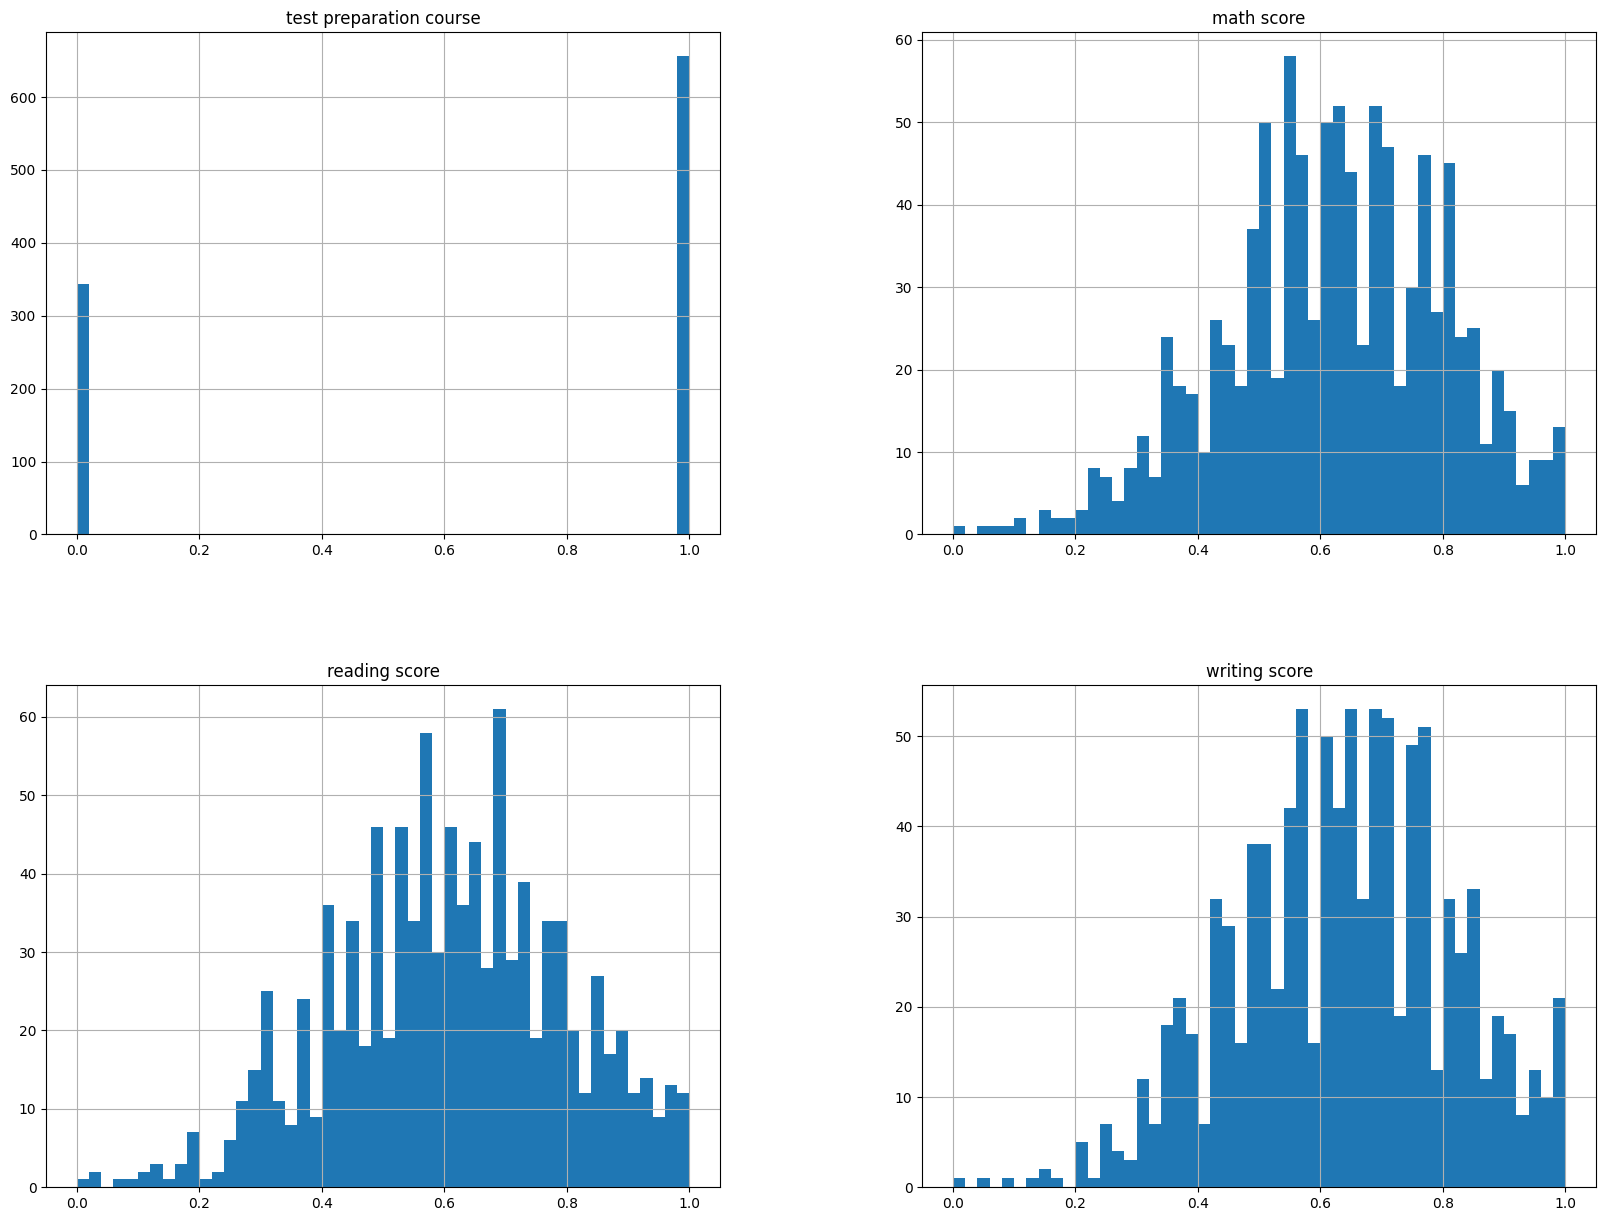

In [12]:
df_normalized.hist(bins=50, figsize=(20,15))
plt.show()

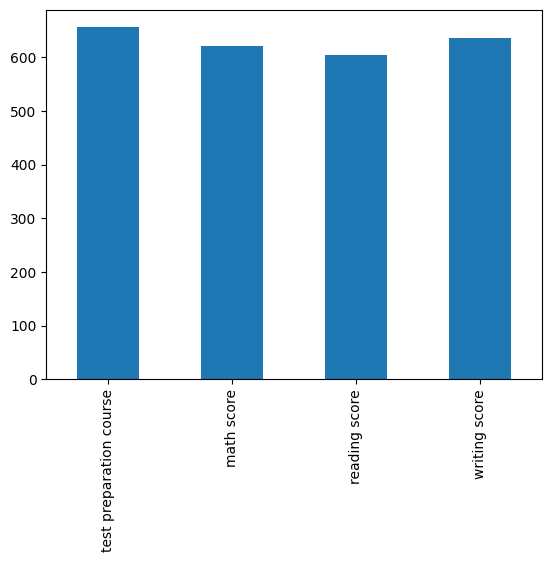

In [13]:
df_normalized.sum().plot.bar()
plt.show()

In [14]:
df.columns

Index(['test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Pisahkan fitur dan target
X = df_normalized.drop('test preparation course', axis=1)
y = df_normalized['test preparation course']

# Bagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# Buat model Naive Bayes dan latih
model = GaussianNB()
model.fit(X_train, y_train)

# Lakukan prediksi
y_pred = model.predict(X_test)

# Hitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.705
